# Piece

When we put a small piece of a page in the pipeline we get problems.

In [1]:
%load_ext autoreload
%autoreload 2

Import the fusus package.
If you do not have it yet, see
[get fusus](https://among.github.io/fusus/fusus/about/install.html#get-the-software).

In [2]:
from fusus.book import Book

Initialize the processing line.

In [3]:
B = Book(cd="~/github/among/fusus/pathological")

  0.00s Batch of 1 pages: 999
  0.00s Start batch processing images
   |     0.26s     1 999.jpg                                 
  0.27s all done


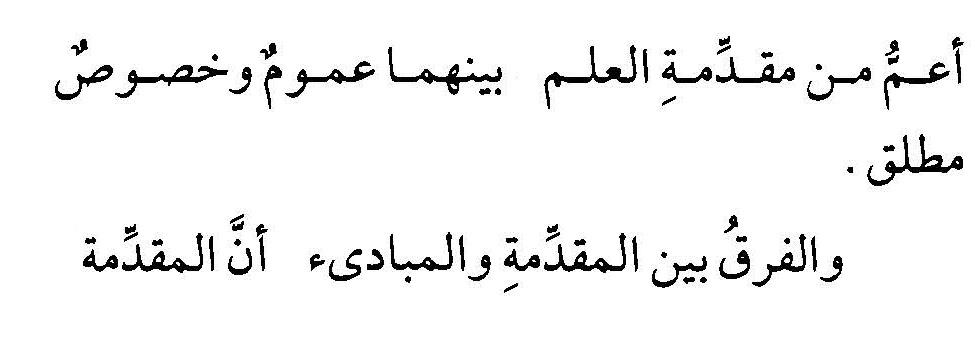

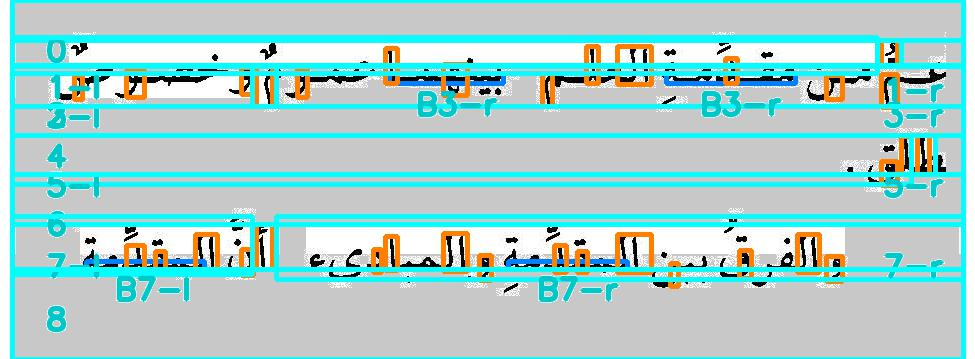

In [4]:
lastPage = B.process(pages=999, doOcr=False, batch=False)
lastPage.show(stage="orig,layout")

Layout detection has failed spectacularly, and the main reason is that too many
horizontal and vertical strokes have been detected.

If we try the complete pipeline, including OCR, we get an error,
even before the actual OCR process.
Something in preparing the images is going out of bounds:

In [5]:
try:
    lastPage = B.process(pages=999, batch=False)
except Exception as e:
    B.error(f"ERROR: {e}\n")

  0.00s Batch of 1 pages: 999
  0.00s Start batch processing images
   |     0.20s Loading for Kraken: ~/github/among/fusus/model/arabic_generalized.mlmodel
   |     7.87s model loaded


   |     8.16s ERROR: tile cannot extend outside image
   |   


We can make this work, by telling the pipeline what fraction of the page this is.
Note that the OCR delivers results.

  0.00s Batch of 1 pages: 999
  0.00s Start batch processing images
   |     0.56s     1 999.jpg                                 
  0.56s all done


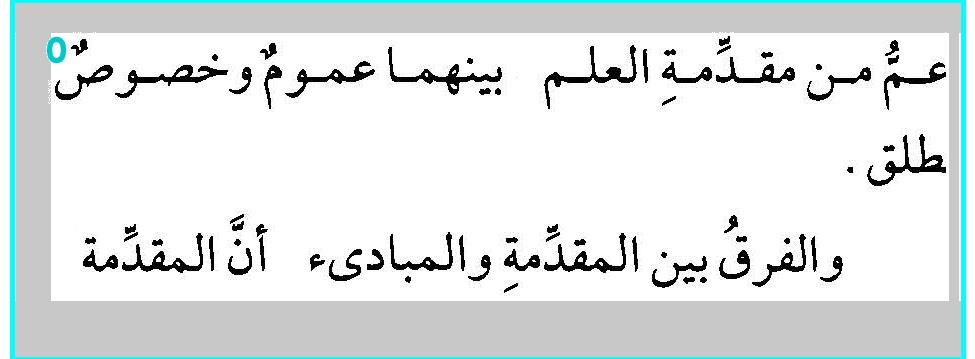

stripe	column	line	left	top	right	bottom	confidence	text
0		1	880	33	941	114	100	عـم
0		1	807	33	865	114	99	من
0		1	661	33	792	114	92	مقدمة
0		1	530	33	646	114	89	العلم
0		1	383	33	500	114	98	بينهما
0		1	261	33	365	114	100	عموم
0		1	53	33	249	114	98	وخصوص
0		2	831	127	934	196	98	طلق.
0		3	729	207	848	302	92	والفرق
0		3	659	207	711	302	99	بين
0		3	507	207	641	302	94	المقدمة
0		3	297	207	493	302	93	والمبادىء
0		3	229	207	271	302	95	أن
0		3	67	207	219	302	93	المقدمة


In [6]:
lastPage = B.process(pages=999, sizeW=0.5, sizeH=0.1, batch=False)
lastPage.show(stage="layout,word")